<a href="https://colab.research.google.com/github/benvictoria21/pandas/blob/master/Suicide_rates_and_possible_causes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
import seaborn as sb
sb.set(style="whitegrid" , rc={'figure.figsize':(10,5)} , palette = "Blues")
pd.options.display.max_rows = 500 

In [73]:
csv_path = "https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/pollution_india_2010%20(1).csv"
df = pd.read_csv(csv_path)
df.head()

,City,NO2,PM10,SO2,State
0,Chitoor,9,39,4,Andhra Pradesh
1,Guntur,11,81,2,Andhra Pradesh
2,Hydrabad,24,79,5,Andhra Pradesh
3,Kothagudem,11,62,2,Andhra Pradesh
4,Kurnool,9,85,4,Andhra Pradesh


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    181 non-null    object
 1   NO2     181 non-null    object
 2   PM10    181 non-null    object
 3   SO2     181 non-null    object
 4   State   181 non-null    object
dtypes: object(5)
memory usage: 7.2+ KB


In [75]:
non_null_df = df.replace("Null" , np.nan).dropna(axis = 0)

In [76]:
non_null_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 180
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    175 non-null    object
 1   NO2     175 non-null    object
 2   PM10    175 non-null    object
 3   SO2     175 non-null    object
 4   State   175 non-null    object
dtypes: object(5)
memory usage: 8.2+ KB


In [77]:
non_null_df[["NO2","PM10","SO2"]] = non_null_df[["NO2","PM10","SO2"]].astype("int")

In [78]:
non_null_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 180
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    175 non-null    object
 1   NO2     175 non-null    int64 
 2   PM10    175 non-null    int64 
 3   SO2     175 non-null    int64 
 4   State   175 non-null    object
dtypes: int64(3), object(2)
memory usage: 8.2+ KB


In [79]:
district_no2 = non_null_df[["City" , "NO2"]]
top10_district_no2 = district_no2.sort_values(by = "NO2" , axis = 0 , ascending= False)[:10]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

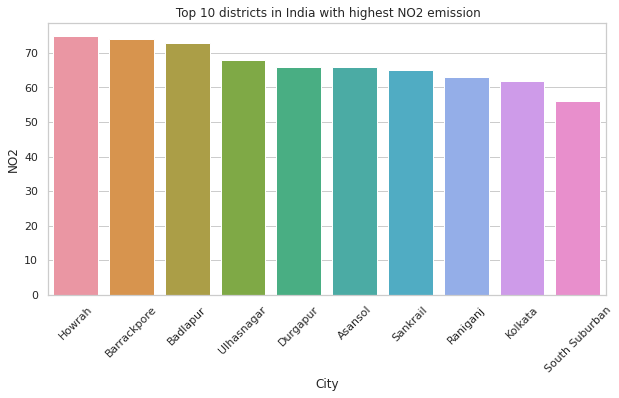

In [80]:
sb.barplot(x="City", y="NO2", data=top10_district_no2)
plt.title(" Top 10 districts in India with highest NO2 emission")
plt.xticks(rotation=45)

In [81]:
state_no2_pm10_so2= pd.DataFrame(non_null_df.groupby("State")["NO2","PM10","SO2"].mean().reset_index())
state_no2_pm10_so2.head()

,State,NO2,PM10,SO2
0,Andhra Pradesh,14.076923,68.692308,4.615385
1,Assam,14.750000,69.500000,6.166667
2,Bihar,40.000000,181.000000,7.000000
3,Chandigarh,16.000000,92.000000,2.000000
4,Chattisgarh,28.666667,167.333333,12.333333


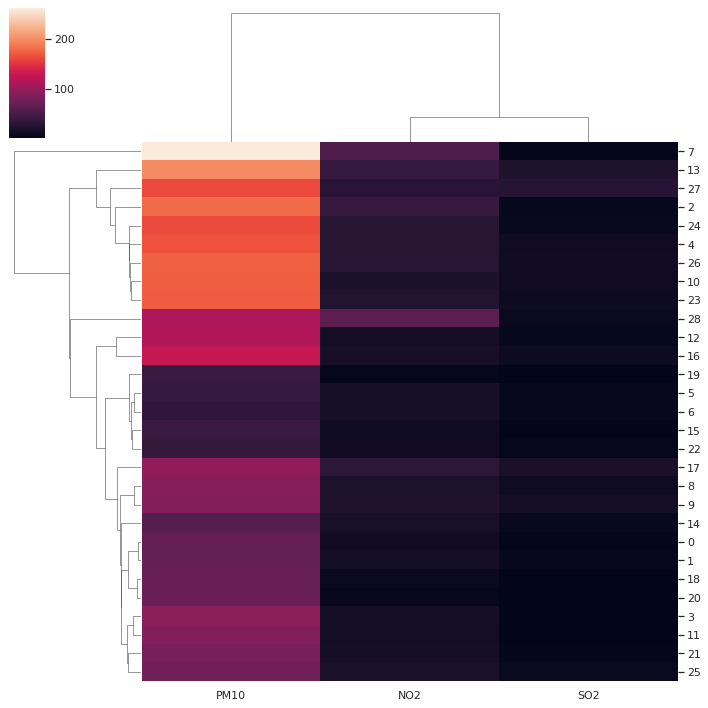

In [82]:
sb.clustermap(state_no2_pm10_so2[["NO2","PM10","SO2"]], method="single")

Text(0.5, 1.0, 'NO2, SO2, PM10 Correlation heatmap')

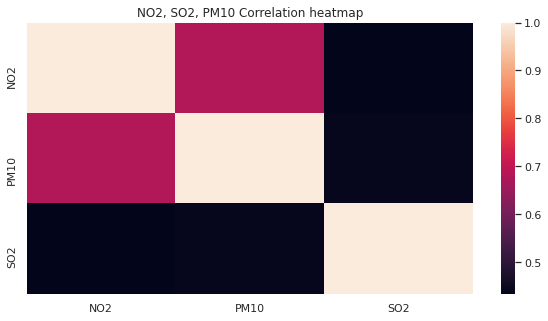

In [83]:
sb.heatmap(state_no2_pm10_so2.corr())
plt.title("NO2, SO2, PM10 Correlation heatmap")

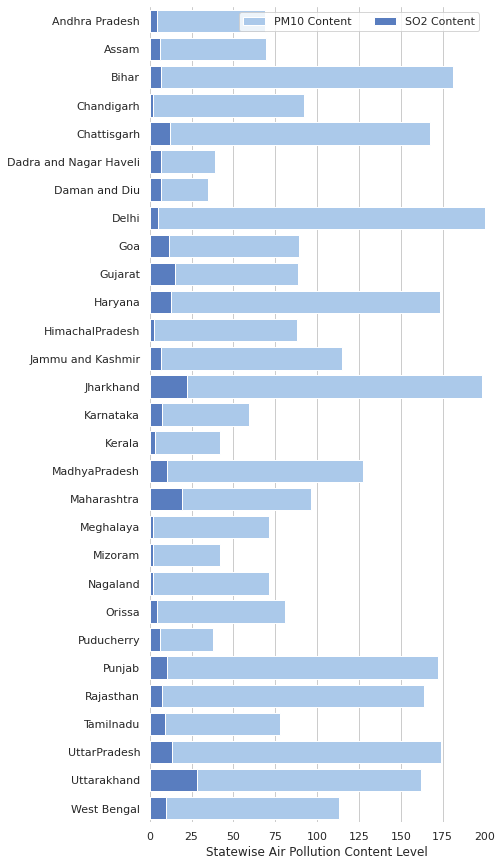

In [84]:
f, ax = plt.subplots(figsize=(6, 15))

sb.set_color_codes("pastel")
sb.barplot(x = "PM10" , y= "State" , data = state_no2_pm10_so2 , label = "PM10 Content" , color = "b" )
sb.set_color_codes("muted")
sb.barplot(x = "SO2" , y= "State" , data = state_no2_pm10_so2 , label = "SO2 Content" , color = "b")


ax.legend(ncol=2, loc="best", frameon=True)
ax.set(xlim=(0, 200), ylabel="",
       xlabel="Statewise Air Pollution Content Level")
sb.despine(left=True, bottom=True)

Text(0.5, 1.0, 'Statewise NO2, SO2, PM10 Level')

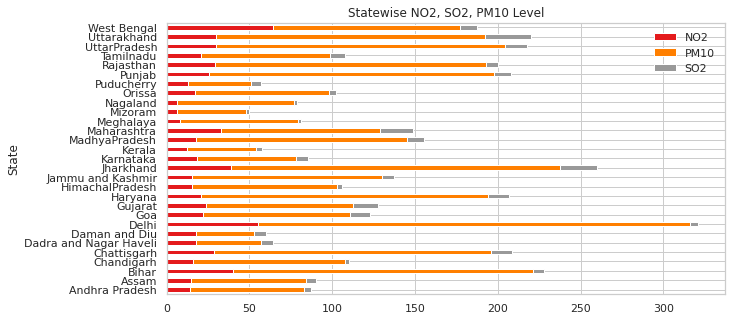

In [85]:
state_no2_pm10_so2.set_index('State').plot(kind='barh', stacked=True , cmap = "Set1" )
plt.title("Statewise NO2, SO2, PM10 Level")

Text(0, 0.5, 'NO2')

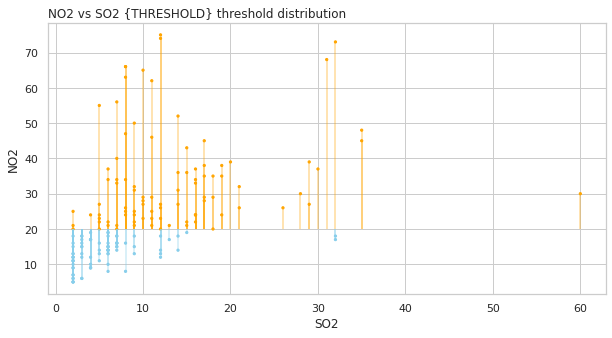

In [86]:
y = non_null_df["NO2"]
x = non_null_df["SO2"]
my_color=np.where(y>=20, 'orange', 'skyblue')
 
THRESHOLD = 20 
import seaborn as sns
plt.vlines(x=x, ymin=THRESHOLD, ymax=y, color=my_color, alpha=0.4)
plt.scatter(x, y, color=my_color, s=5, alpha=1)
 
# Add title and axis names
plt.title("NO2 vs SO2 {THRESHOLD} threshold distribution", loc='left')
plt.xlabel('SO2')
plt.ylabel('NO2')

Text(0, 0.5, 'NO2')

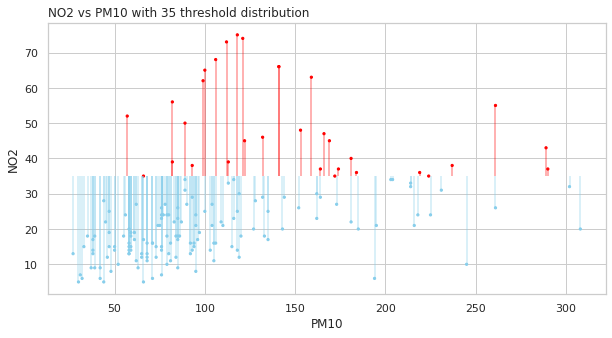

In [87]:
THRESHOLD = 35

y = non_null_df["NO2"]
x = non_null_df["PM10"]
my_color=np.where(y>=THRESHOLD, 'red', 'skyblue')
 

import seaborn as sns
plt.vlines(x=x, ymin=THRESHOLD, ymax=y, color=my_color, alpha=0.4)
plt.scatter(x, y, color=my_color, s=5, alpha=1)
 

plt.title(f"NO2 vs PM10 with {THRESHOLD} threshold distribution", loc='left')
plt.xlabel('PM10')
plt.ylabel('NO2')

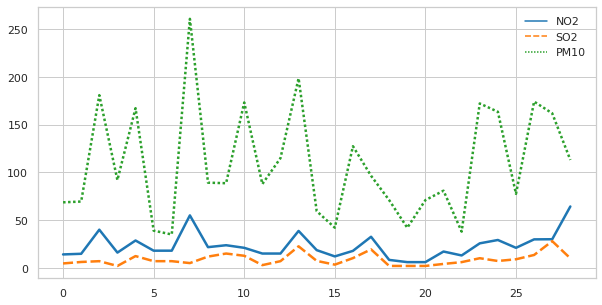

In [88]:
sb.lineplot(data=state_no2_pm10_so2[["NO2" , "SO2", "PM10"]], palette="tab10", linewidth=2.5)

Text(0.5, 1.0, 'State wise PM10 vs NO2 Distribution')

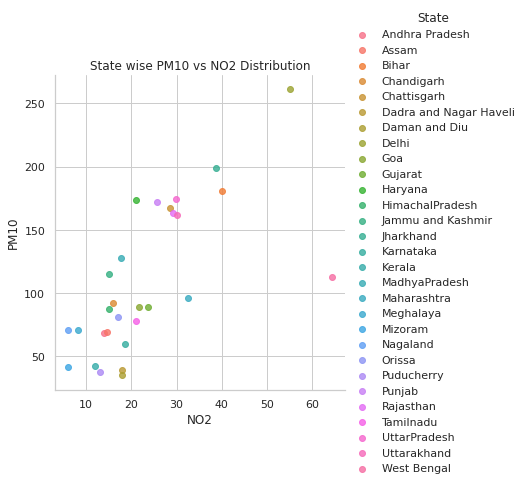

In [89]:
sb.lmplot(x= "NO2", y="PM10", hue="State",
               truncate=True, height=5, data=state_no2_pm10_so2)
plt.title("State wise PM10 vs NO2 Distribution")

Text(0.5, 1.0, 'State wise PM10 vs SO2 Distribution')

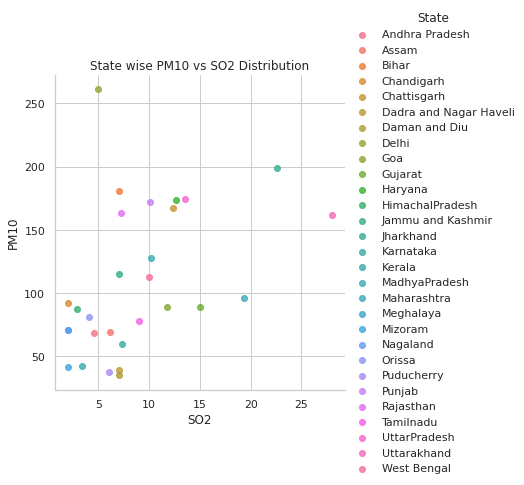

In [90]:
sb.lmplot(x= "SO2", y="PM10", hue="State",
               truncate=True, height=5, data=state_no2_pm10_so2)
plt.title("State wise PM10 vs SO2 Distribution")

In [91]:
from mpl_toolkits import mplot3d

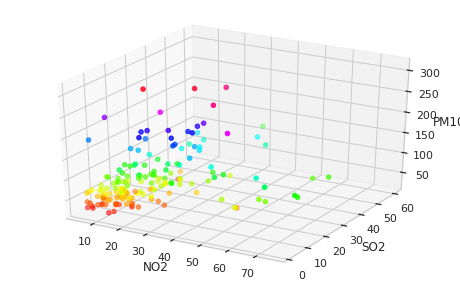

In [92]:
fig = plt.figure(figsize = (8 , 5))
ax = plt.axes(projection="3d")

NO2 = non_null_df["NO2"] 
SO2 = non_null_df["SO2"]
PM10 = non_null_df["PM10"]
ax.scatter3D(NO2, SO2, PM10, c=PM10, cmap='hsv')
ax.set_xlabel('NO2')
ax.set_ylabel('SO2')
ax.set_zlabel('PM10')
plt.show()

In [93]:
non_null_df["State"].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chattisgarh',
       'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'HimachalPradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'MadhyaPradesh', 'Maharashtra',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Orissa', 'Punjab',
       'Puducherry', 'Rajasthan', 'Tamilnadu', 'UttarPradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [94]:
def statewise_data(state_name): 
    try:
        return non_null_df[non_null_df["State"] == state_name]
    except Exception as e:
        return e

Text(0.5, 1.0, ' Karnataka State Air Pollutants')

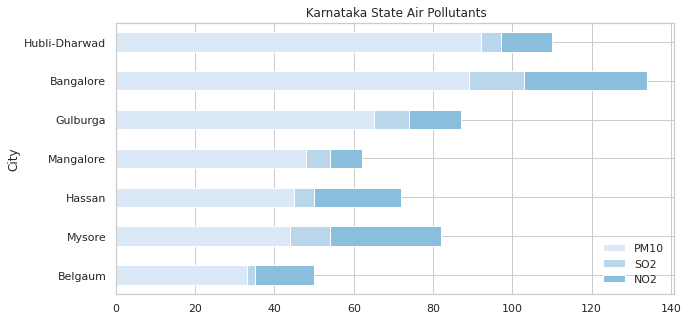

In [95]:
statewise_data("Karnataka").sort_values(by = "PM10").set_index("City")[["PM10" , "SO2" , "NO2"]].plot(kind='barh', stacked=True )
plt.title(" Karnataka State Air Pollutants")

Text(0.5, 1.0, ' Delhi State Air Pollutants')

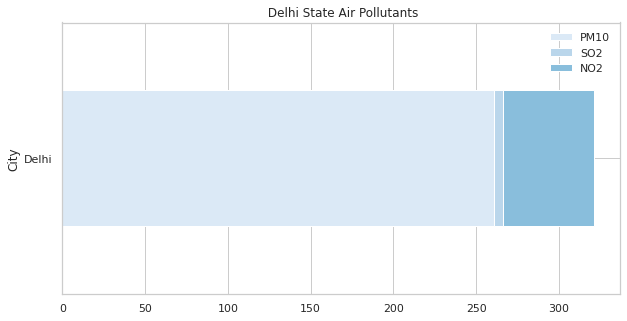

In [96]:
statewise_data("Delhi").sort_values(by = "PM10").set_index("City")[["PM10" , "SO2" , "NO2"]].plot(kind='barh', stacked=True )
plt.title(" Delhi State Air Pollutants")

Text(0.5, 1.0, ' Goa State Air Pollutants')

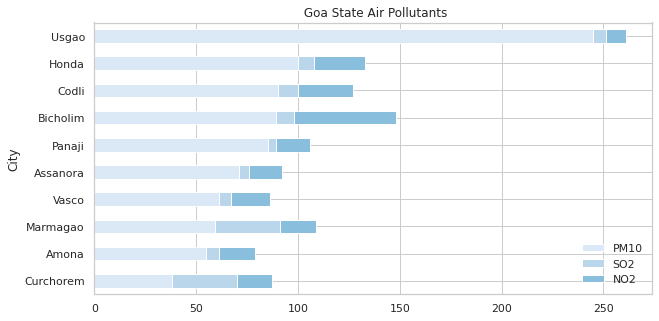

In [97]:
statewise_data("Goa").sort_values(by = "PM10").set_index("City")[["PM10" , "SO2" , "NO2"]].plot(kind='barh', stacked=True )
plt.title(" Goa State Air Pollutants")

Text(0.5, 1.0, ' West Bengal State Air Pollutants')

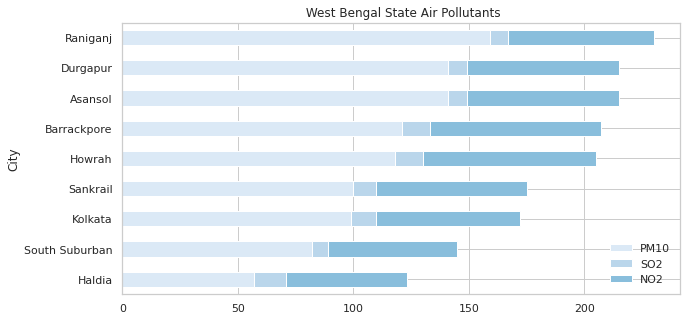

In [98]:
statewise_data("West Bengal").sort_values(by = "PM10").set_index("City")[["PM10" , "SO2" , "NO2"]].plot(kind='barh', stacked=True )
plt.title(" West Bengal State Air Pollutants")

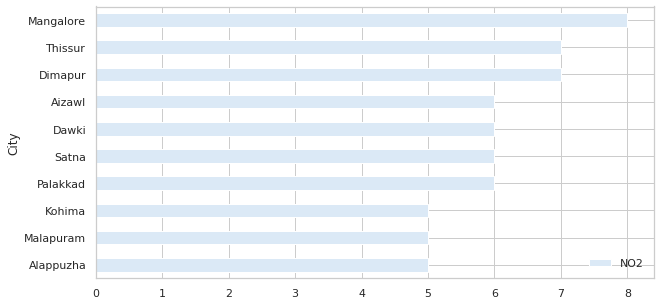

In [99]:
non_null_df.sort_values(by = "NO2")[["City" , "NO2"]].set_index("City")[:10].plot(kind='barh')

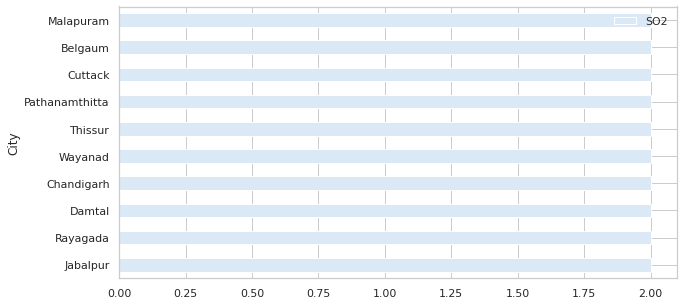

In [100]:
non_null_df.sort_values(by = "SO2")[["City" , "SO2"]].set_index("City")[:10].plot(kind='barh')

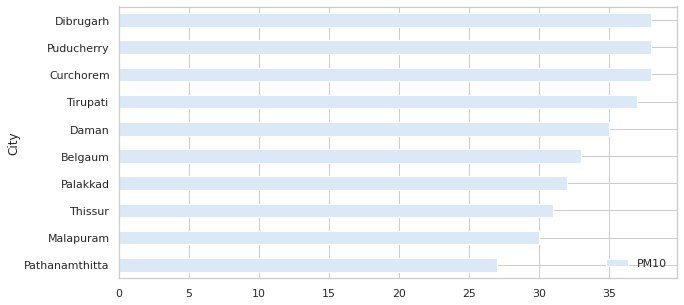

In [101]:
non_null_df.sort_values(by = "PM10")[["City" , "PM10"]].set_index("City")[:10].plot(kind='barh')